In [3]:
#importing the dependeices

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image #pillow use for image processing task
import tensorflow as tf
tf.random.set_seed(3) #like random state
from tensorflow import keras
from keras.datasets import mnist #famous dataset for beginers
from tensorflow.math import confusion_matrix


In [4]:
#loading mnist data from  keras.dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
tf.shape(x_train) #total 600000 images with each image contain 28*28 pixel

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([60000,    28,    28], dtype=int32)>

In [6]:
#traing data =60000 images
#test data=10000 images
#each image has dimenstion of 28*28
#grey scale image  only one channel

In [7]:
#printing the 10 image

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(x_train[10].shape)

(28, 28)


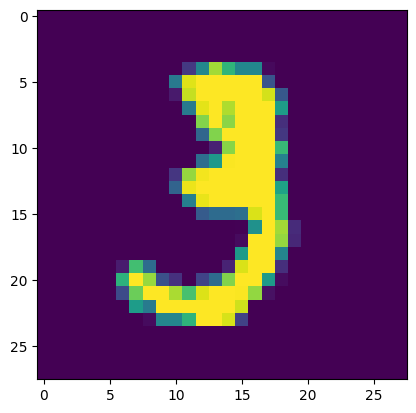

3


In [9]:
#converting the above numpy array into for display image

plt.imshow(x_train[10])
plt.show()
#print the corresponding labels
print(y_train[10])

In [10]:
#image labels..

print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [11]:
#find the unique vales in the array


print(np.unique(y_train))

print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
#resize into common dimension..
#normalization
x_train=x_train/255
x_test=x_test/255


In [13]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
#Buliding Neural Network
#setting layers of the meual network


model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])


In [16]:
#comple
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
#training the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2438 - accuracy: 0.9288
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1036 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0728 - accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0439 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0251 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0206 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [18]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9778
0.9778000116348267


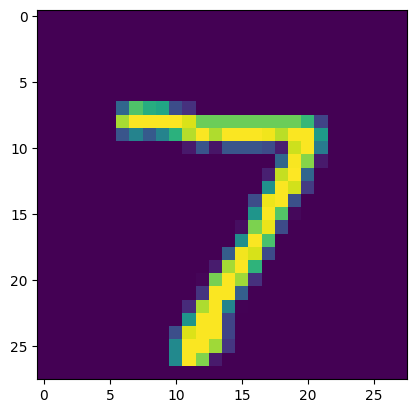

In [19]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [20]:
print(y_test[0]) #y_test=ist he label value for identiy

7


In [21]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [22]:
print(y_pred[0]) #label values

[1.8748021e-04 6.7809061e-04 1.5956486e-02 9.6169740e-01 2.4980449e-07
 2.0898756e-02 1.9975950e-08 9.9999982e-01 4.6577132e-03 1.2101739e-01]


In [23]:
#converting the predcition probabilities to class label

label_for_the_first_test_image=np.argmax(y_pred[0])
print(label_for_the_first_test_image)


7


In [24]:
print(y_pred)

[[1.8748021e-04 6.7809061e-04 1.5956486e-02 ... 9.9999982e-01
  4.6577132e-03 1.2101739e-01]
 [2.8156759e-02 8.8587022e-01 1.0000000e+00 ... 2.9179552e-03
  2.3093688e-01 2.6406630e-10]
 [5.1980365e-05 9.9998951e-01 3.4823671e-02 ... 1.7968565e-01
  6.3452739e-01 2.0268487e-04]
 ...
 [6.1649416e-14 4.2581115e-02 1.2215354e-13 ... 2.5177959e-01
  6.1827523e-01 9.9773258e-01]
 [2.4834393e-05 2.0794098e-04 8.0792023e-10 ... 2.2684659e-03
  8.6175096e-01 1.5031451e-09]
 [3.9525989e-05 1.0823375e-03 6.0974940e-04 ... 2.8488752e-12
  2.6177543e-01 1.8537825e-10]]


In [25]:
labelsss=[np.argmax(i) for i in y_pred]
print(labelsss) #predicted labels

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test=== true labels

y_predict=labelss====predicted labels


In [26]:
#confusion metrix

conf_metrix=confusion_matrix(y_test,labelsss)
print(conf_metrix)

tf.Tensor(
[[ 969    0    0    0    2    1    1    3    3    1]
 [   0 1123    1    3    0    1    1    0    6    0]
 [   3    1 1003    7    2    0    0    8    6    2]
 [   0    0    2  992    0    4    0    3    4    5]
 [   0    0    6    0  954    0    2    5    0   15]
 [   2    1    0   14    2  859    3    1    8    2]
 [   4    3    0    1    3    4  936    1    6    0]
 [   2    4    7    3    1    0    0 1003    3    5]
 [   0    1    4    6    1    2    0    5  953    2]
 [   1    2    0    6    6    1    1    6    1  985]], shape=(10, 10), dtype=int32)


<function matplotlib.pyplot.show(close=None, block=None)>

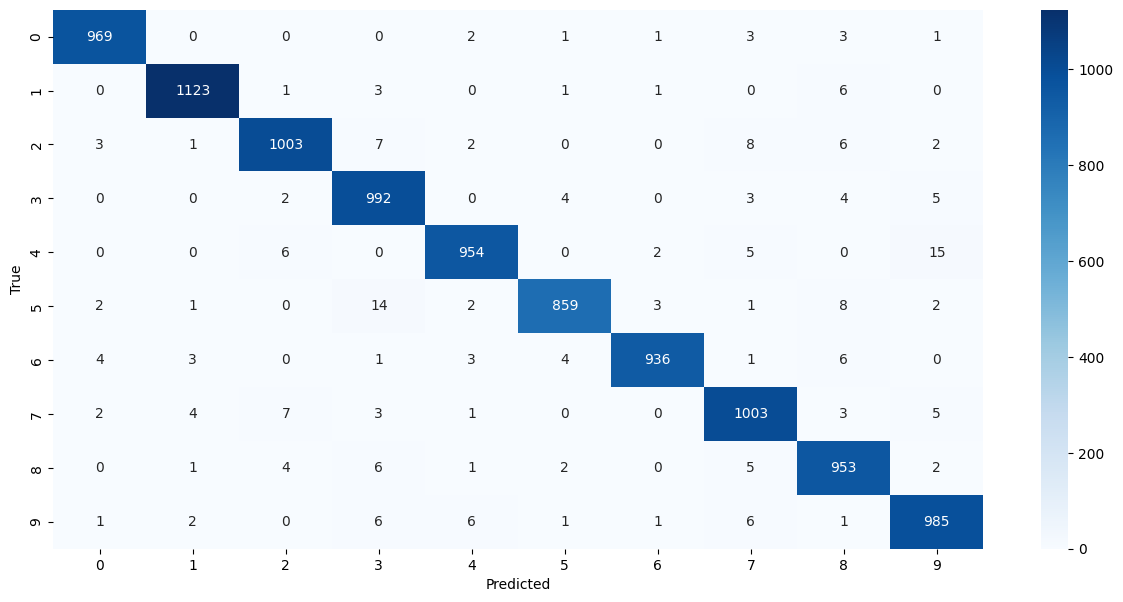

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_metrix,annot=True,fmt='d',cmap='Blues')  #d=integer
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

in the above figure 970 means 970 0's are correctely predicted as 0

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
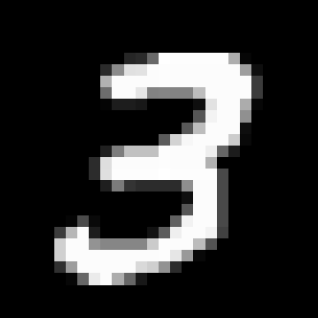

In [28]:
#building a predictive system

Input_image_path='/content/drive/MyDrive/CNN_DATA/MNIST_digit.png'
input_img=cv2.imread(Input_image_path)
input_img

In [59]:
type(input_img)

numpy.ndarray

In [29]:
grey=cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
print(grey)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:

input_image_resize = cv2.resize(grey, (28, 28))
input_image_resize.shape

(28, 28)

In [38]:
cv2_imshow(input_image_resize)

In [40]:
input_image_resize=input_image_resize/255


In [41]:
input_image_resize

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [42]:
image_reshaped=np.reshape(input_image_resize,[1,28,28]) #this means that it is using only for one ing with 28*28
image_reshaped

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [43]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 34ms/step
[[3.8147433e-14 6.5280678e-06 3.7409786e-06 1.0000000e+00 4.6645933e-08
  5.7070892e-02 1.2690725e-20 7.6344156e-01 5.6343651e-01 9.9991053e-01]]


In [45]:
input_prdc_label=np.argmax(input_prediction)
input_prdc_label

3

predicton


In [46]:
inp_path='/content/drive/MyDrive/CNN_DATA/number7.png'


In [48]:
new=cv2.imread(inp_path)

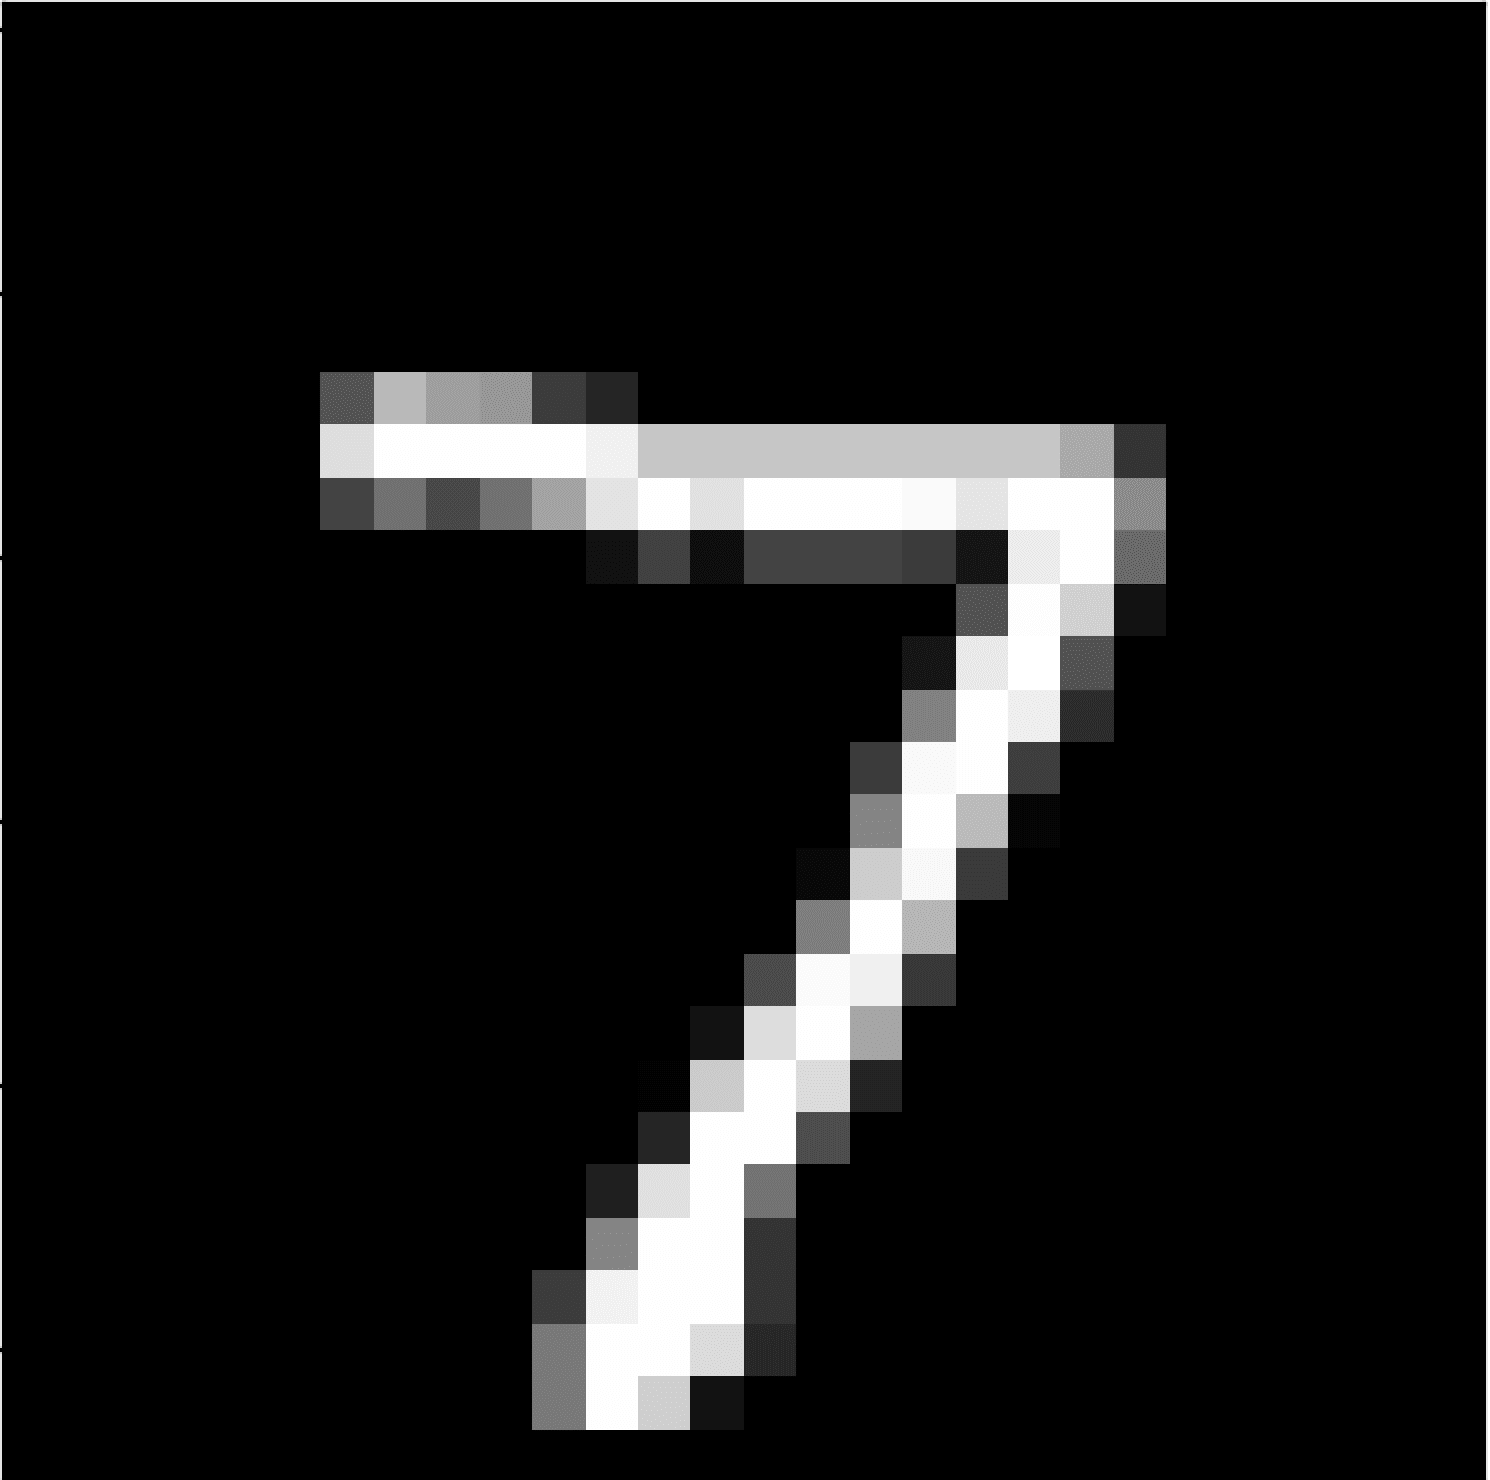

In [51]:
news=cv2_imshow(new)

In [58]:
type(news)

NoneType

In [60]:
model.save('numbers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
